# Video Game Analysis Seminar
### Shraddha Vasa
### 121922502020
### M.Sc Data Science

## Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Import Video Games Dataset

In [2]:
games = pd.read_csv('vgsales.csv')
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
# to print the full summary 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
games.shape

(16598, 11)

In [5]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
games.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
games.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
games.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [8]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
games['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [10]:
games['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


#### Handling null values

In [11]:
games.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [13]:
games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
games.isnull().values.any()

True

In [13]:
games[games['Year'].isnull()].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [14]:
games.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


In [15]:
year_corr = games.corr()["Year"]
year_corr.abs().sort_values(ascending=False)[1:]

Rank            0.178814
JP_Sales        0.169316
NA_Sales        0.091402
Global_Sales    0.074735
Other_Sales     0.041058
EU_Sales        0.006014
Name: Year, dtype: float64

I cannot really come up with an idea of how to fill these missing year values. It is certainly not too correlated with other columns as the list shows. I will just drop all rows with missing values.

In [16]:
 set(games["Publisher"])

{'10TACLE Studios',
 '1C Company',
 '20th Century Fox Video Games',
 '2D Boy',
 '3DO',
 '49Games',
 '505 Games',
 '5pb',
 '7G//AMES',
 '989 Sports',
 '989 Studios',
 'AQ Interactive',
 'ASC Games',
 'ASCII Entertainment',
 'ASCII Media Works',
 'ASK',
 'Abylight',
 'Acclaim Entertainment',
 'Accolade',
 'Ackkstudios',
 'Acquire',
 'Activision',
 'Activision Blizzard',
 'Activision Value',
 'Adeline Software',
 'Aerosoft',
 'Agatsuma Entertainment',
 'Agetec',
 'Aksys Games',
 'Alawar Entertainment',
 'Alchemist',
 'Alternative Software',
 'Altron',
 'Alvion',
 'American Softworks',
 'Angel Studios',
 'Answer Software',
 'Aqua Plus',
 'Aques',
 'Arc System Works',
 'Arena Entertainment',
 'Aria',
 'Arika',
 'ArtDink',
 'Aruze Corp',
 'Ascaron Entertainment',
 'Ascaron Entertainment GmbH',
 'Asgard',
 'Asmik Ace Entertainment',
 'Asmik Corp',
 'Aspyr',
 'Astragon',
 'Asylum Entertainment',
 'Atari',
 'Athena',
 'Atlus',
 'Avalon Interactive',
 'Avanquest',
 'Avanquest Software',
 'Axela'

#### Lets consider the NES games only now

In [17]:
games[games["Platform"] == "NES"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
127,128,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
...,...,...,...,...,...,...,...,...,...,...,...
5862,5864,Famista '91,NES,1990.0,Sports,Namco Bandai Games,0.00,0.00,0.30,0.00,0.30
6161,6163,Famista '92,NES,1991.0,Sports,Namco Bandai Games,0.00,0.00,0.28,0.00,0.28
10309,10311,Final Fantasy I & II,NES,1994.0,Role-Playing,Square,0.00,0.00,0.11,0.00,0.11
11985,11987,Teenage Mutant Ninja Turtles: Tournament Fighters,NES,1992.0,Fighting,Konami Digital Entertainment,0.04,0.01,0.02,0.00,0.07


#### Lets simpify the dataframe a bit

In [18]:
nes_sales = games[["Name", "Year", "Global_Sales"]]
nes_sales.head()

,Name,Year,Global_Sales
0,Wii Sports,2006.0,82.74
1,Super Mario Bros.,1985.0,40.24
2,Mario Kart Wii,2008.0,35.82
3,Wii Sports Resort,2009.0,33.00
4,Pokemon Red/Pokemon Blue,1996.0,31.37


### The value_counts function

##### Quickly know how many games have been released for each platform

In [19]:
games['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

This bar plot (Platforms) was created to show amount of platforms selection for games. As it can be seen in the graph, DS and PS2 are most selected platform. As most of datas belongs to past years, this visualization can be acceptable.

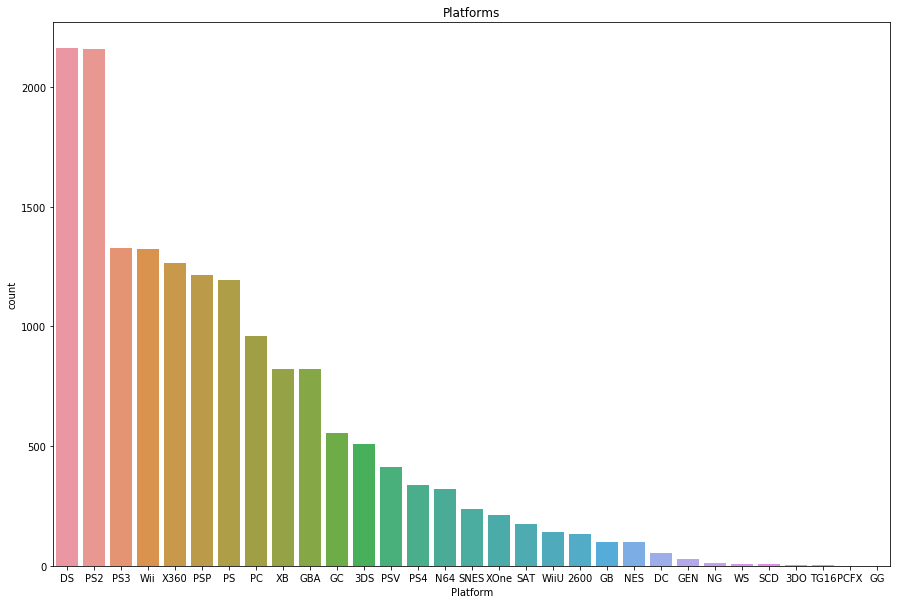

DS      13.031691
PS2     13.019641
PS3      8.006989
Wii      7.982890
X360     7.621400
PSP      7.308109
PS       7.205687
PC       5.783829
XB       4.964454
GBA      4.952404
GC       3.349801
3DS      3.066635
PSV      2.488252
PS4      2.024340
N64      1.921918
SNES     1.439933
XOne     1.283287
SAT      1.042294
WiiU     0.861550
2600     0.801301
GB       0.590433
NES      0.590433
DC       0.313291
GEN      0.162670
NG       0.072298
WS       0.036149
SCD      0.036149
3DO      0.018074
TG16     0.012050
PCFX     0.006025
GG       0.006025
Name: Platform, dtype: float64


In [21]:
plt.figure(figsize=(15, 10))
plt.title("Platforms")
sns.countplot(x=games['Platform'], order=games['Platform'].value_counts().index)
plt.show()

print(games['Platform'].value_counts() / games.shape[0] * 100)

You can see DS and PS2 have the most games in their platform and now, we can see the detail of genre of game in platform that have more than 1000 games. 

In [22]:
games['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

Between 1980 and 2020, the most preferred game type are action games.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

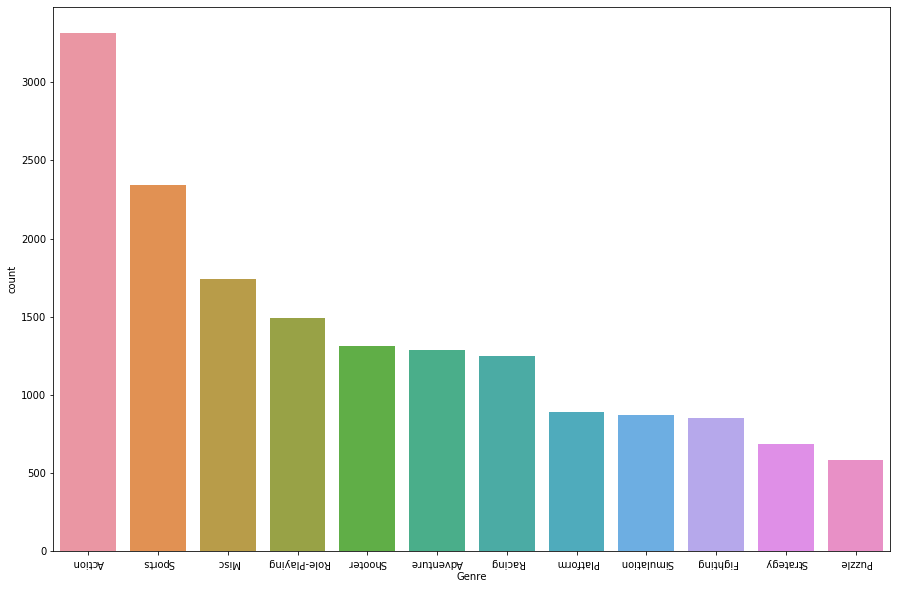

In [23]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=games, order=games['Genre'].value_counts().index)
plt.xticks(rotation=180)

### Correlation between sales region

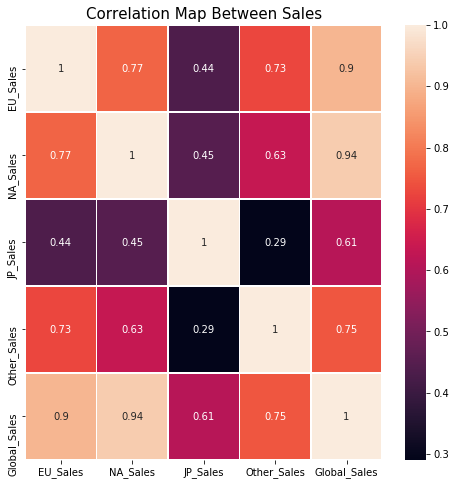

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(games[['EU_Sales','NA_Sales','JP_Sales','Other_Sales','Global_Sales']].corr(),linewidths=0.5,annot=True)
plt.title('Correlation Map Between Sales',size=15)
plt.show()

Correlations of sales volumes in the regions with each other can be seen in the map chart. As the correlation ratio approaches 1, the positive linear relationship increases. The most positive relationship between EU_Sales and Global can be seen in this chart.

### Now let's do some exploratory data analysis on the dataset

In [25]:
# top 100 games according to their rank
top100=games.head(100)

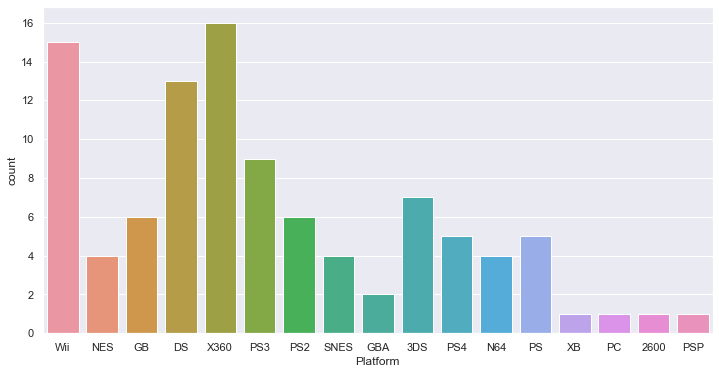

In [26]:
# let's look at the most popular platforms
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Platform',data=top100)

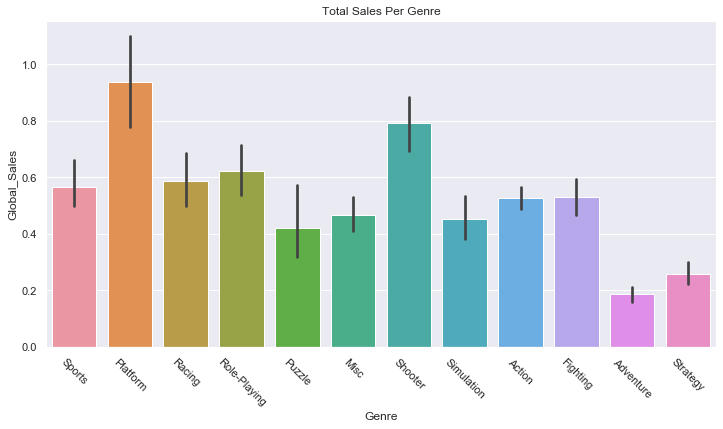

In [28]:
sns.barplot(x='Genre', y='Global_Sales', data=games)
plt.title("Total Sales Per Genre")
plt.xticks(rotation=-45)
plt.show()

### Find the mean on Global Sales and Year

In [27]:
t= games.Global_Sales.mean()
t

0.53744065550074

In [28]:
m= games.Year.mean()
m

2006.4064433147546

### Years in which Games are released

First, we get the count of number of games released for each year in the dataset.

We first get the data for the top 10 years. We observe that the highest number of games (according to this dataset) released is from 2007 to 2011.`

In [29]:
games.groupby('Year')['Name'].count().sort_values(ascending = False).head(10)

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
Name: Name, dtype: int64

Bottom 10 years. We note that 2020 and 2017 are in the lowest, and this is likely due to incomplete data since this dataset is updated in 2017. Hence, we will remove data from 2017 and 2020, as they are unlikely to produce any valuable insights into the gaming industry for the years 2017 and 2020.

In [30]:
games.groupby('Year')['Name'].count().sort_values().head(10)

Year
2020.0     1
2017.0     3
1980.0     9
1984.0    14
1985.0    14
1988.0    15
1987.0    16
1990.0    16
1983.0    17
1989.0    17
Name: Name, dtype: int64

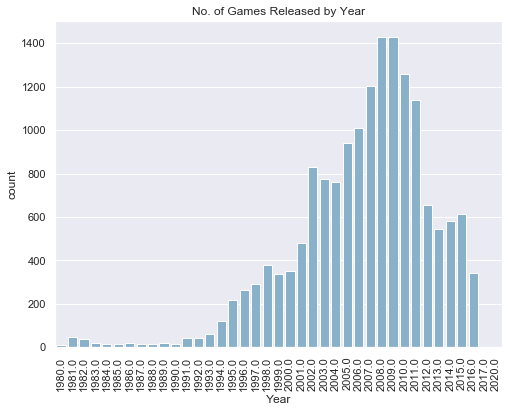

In [31]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(games['Year'], color = '#7FB3D5')
plt.title('No. of Games Released by Year')
plt.xticks(rotation = 90)
plt.show()

### Comparing the full dataset

We now look at the number of games each Publisher published.

Similar to above, an arbitrary threshold of 100 games were set so we can focus on the more established Publishers.

Unsurprisingly, EA produced the most games, which also partly explains it's second position in the global sales ranking (after all, more games released do generate more sales to some extent). On the other hand, the top performer, Nintendo, produced approximately half of EA at 696 games, signifying more sales were generated per game for Nintendo.

Also unsurprising, is that the publishers with high global sales, also had released many games as well (Activision, Ubisoft, Sony etc.) as these companies appear in the top for both lists.

In [32]:
all_count = games.groupby('Publisher')[['Global_Sales']].count()
all_count[all_count['Global_Sales'] > 100].sort_values('Global_Sales', ascending = False)

,Global_Sales
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
THQ,715
Nintendo,703
Sony Computer Entertainment,683
Sega,639
